In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

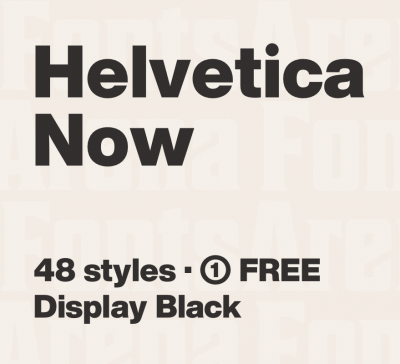

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

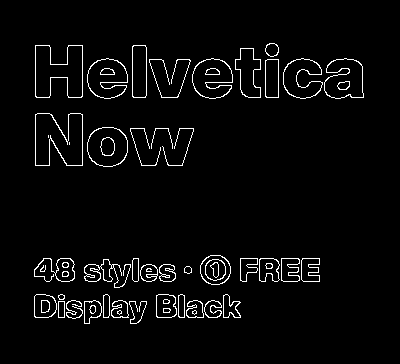

In [6]:
cv2_imshow(edges)

## Vertical Edge Detector

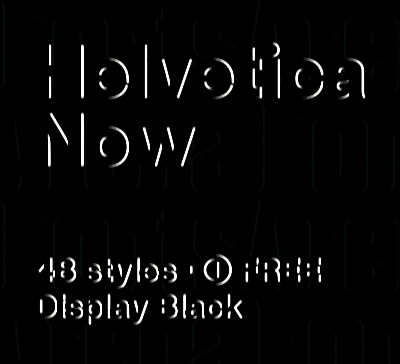

In [7]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Horizontal Edge Detector

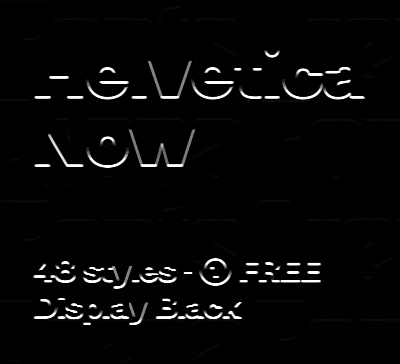

In [8]:
kernel = np.float32([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
horizontal_edge = cv2.filter2D(image, -1 , kernel)
cv2_imshow(horizontal_edge)
# This was pretty easy. I just had to take the transpose of previous kernel to make it horizontal edge detector

## 45 Degree Angle Detector

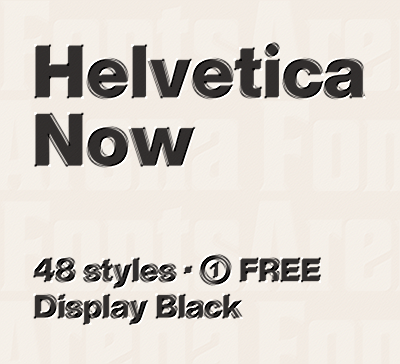

In [9]:
kernel = np.float32([[-1, 0, 1], [0, 1, 0], [1, 0, -1]])
deg45 = cv2.filter2D(image, -1 , kernel)
cv2_imshow(deg45)

# following the trends from previous two examples, arranged the one and minus ones in diagonal order and it worked.

## Blur Kernel

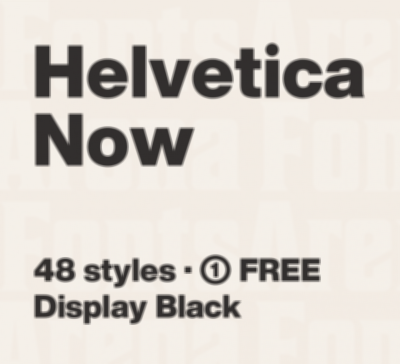

In [10]:
kernel = np.float32([[2/12, 1/12 , 2/12],[1/12, 0, 1/12],[2/12, 1/12, 2/12]])
blur = cv2.filter2D(image, -1 , kernel)
cv2_imshow(blur)

# I realised that for blur filter the middle value of the kernel should be somehting which is very low value and the more we go outwards it should have higher values.
# So based on that thinking I started with filter values such as [[1, 0 , 1],[0, -1, 0],[1, 0, 1]]. Yeah but the result was not as expected. So tried different combinations keeping the same thought in mind
# like [[2 , 1, 2],[1, 0 , 1],[2, 1, 2]]. In few cases the outcome was coming full white. Then after several iterations I realised that when the summation of all the kernels is one then it was giving good result.
# So finally I came out with this solution

## Sharpen Kernel

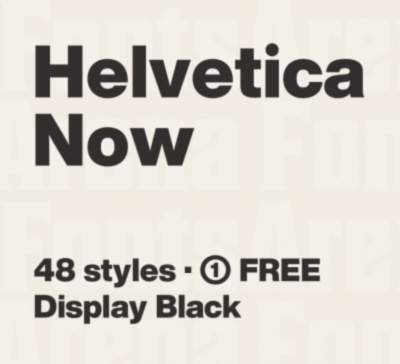

In [14]:
kernel = np.float32([[0, 1/6, 0], [1/6, 2/6, 1/6], [0, 1/6, 0]])
blur = cv2.filter2D(image, -1 , kernel)
cv2_imshow(blur)

# Using the intuition from the previous example just using the opposite of kernel I got the sharpen kernel

## Identity function

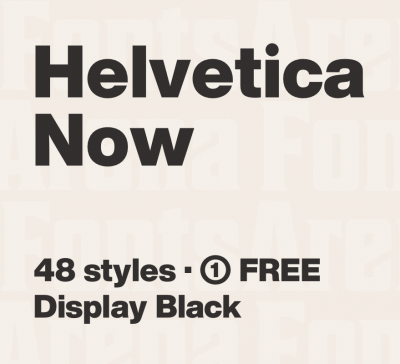

In [18]:
kernel = np.float32([[0, 0, 0],[0,1,0],[0,0,0]])
blur = cv2.filter2D(image, -1 , kernel)
cv2_imshow(blur)

# That was pretty easy. We had save one value, because the other values we can have when shift the kernel by 1 stride. So I just had to keep only the middle pixel one and rest zero.